# DI 4.10 - Part I Task

## Importing Libraries

In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import os

In [5]:
# Import latest combined dataframe

df_insta = pd.read_pickle(r'D:\Career Foundry\2) Data Immersion\4) Python Fundamentals for Data Analysts\DI 4.2 - Jupyter Folder\Instacart Basket Analysis\02 Data\Prepared Data\df_merged_large_pt1_4.9.pkl')

In [7]:
# Creating Path

path=r'D:\Career Foundry\2) Data Immersion\4) Python Fundamentals for Data Analysts\DI 4.2 - Jupyter Folder\Instacart Basket Analysis'

## Viewing the Data Frame

In [17]:
# Viewing DF

df_insta.head(30)

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,...,First Name,Last Name,Gender,State,Age,date_joined,independants,fam_status,income,merge_origin
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,prior,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,389851,709,prior,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,12198,652770,764,prior,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,12200,1813452,764,prior,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,12372,1701441,777,prior,...,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,13096,1871483,825,prior,...,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,14603,1290456,910,prior,...,Sandra,Trejo,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both
8,0,1,Chocolate Sandwich Cookies,61,19,5.8,17065,369558,1052,prior,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both
9,0,1,Chocolate Sandwich Cookies,61,19,5.8,17070,589712,1052,prior,...,Ralph,Avalos,Male,Oregon,72,3/30/2018,1,married,153843,both


In [21]:
# Viewing Descriptive Information

df_insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   product_id              int64   
 2   product_name            object  
 3   aisle_id                int64   
 4   department_id           int64   
 5   prices                  float64 
 6   Unnamed: 0_y            int64   
 7   order_id                int64   
 8   user_id                 int64   
 9   eval_set                object  
 10  order_number            int64   
 11  order_dow               int64   
 12  order_hour_of_day       int64   
 13  days_since_prior_order  float64 
 14  add_to_cart_order       int64   
 15  reordered               int64   
 16  _merge                  category
 17  merge_source            category
 18  price_range_loc         object  
 19  Busiest day             object  
 20  Busiest days            object  
 21  busies

In [23]:
# Viewing size of data frame

df_insta.shape

(32404859, 36)

### Personally Identifiable Information is present in this data frame as first name and last name. While names are the most sensitive data, the additional information could give anyone the opportunity to locate these individuals. With that being said, this customer data was fabricated for the purpose of this course.

## Customer behavior in different geographic areas

In [34]:
# Creating a Region if-then statment

def geo_label(row):

  if row['State'] in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
    return 'Region 1'
  elif row['State'] in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
    return 'Region 2'
  elif row['State'] in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
    return 'Region 3'
  elif row['State'] in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
    return 'Region 4'
  else:  return 'unknown region'

In [42]:
# Creating Column named Region

df_insta['Region'] = df_insta.apply(geo_label, axis=1)

In [44]:
# Running Region function

df_insta['Region'].value_counts(dropna=False)

Region
Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: count, dtype: int64

In [47]:
# Creating Cross tab for Region and spender_type

crosstab = pd.crosstab(df_insta['Region'], df_insta['spender_type'], dropna = False)

In [77]:
# Which Region spends more

crosstab.head()

spender_type,High spender,Low spender
Region,,
Region 1,1875170,3847566
Region 2,2497034,5100291
Region 3,3549625,7242260
Region 4,2722093,5570820


### Using the new Region column and the previously created spender_type column we can determin that Region 3 has to most high spenders and the most low spenders.

## Excluding customers with low activity

In [162]:
# Exploring order data

low_active_cust = df_insta[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'max_order']]

In [164]:
low_active_cust

,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,max_order
0,28,6,11,3.0,5,32
1,30,6,17,20.0,1,32
2,2,0,21,6.0,20,5
3,1,3,13,NaN,10,3
4,3,4,17,9.0,11,3
...,...,...,...,...,...,...
32404854,2,0,9,5.0,27,6
32404855,1,4,11,NaN,5,4
32404856,5,3,8,15.0,12,20
32404857,9,3,15,5.0,11,20


In [107]:
# If-Then Statement to create exclusion flag

def customer_type(row):
    if row['max_order'] < 5:
        return 'low-activity customer'
    else:
        return 'active customer'

In [121]:
# Applying customer Type function

df_insta['customer_type'] = df_insta.apply(customer_type, axis=1)

In [123]:
# Running customer type function

df_insta['customer_type']

0                 active customer
1                 active customer
2                 active customer
3           low-activity customer
4           low-activity customer
                    ...          
32404854          active customer
32404855    low-activity customer
32404856          active customer
32404857          active customer
32404858          active customer
Name: customer_type, Length: 32404859, dtype: object

In [132]:
# Drop rows with low-activity customer

df_insta_ac = df_insta[df_insta['customer_type'] != 'low-activity customer']

In [144]:
# Checking for active customers

df_insta_ac.head(30)

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,...,Gender,State,Age,date_joined,independants,fam_status,income,merge_origin,Region,customer_type
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region 2,active customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,prior,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,Region 2,active customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,11433,389851,709,prior,...,Female,Vermont,66,6/16/2018,2,married,158302,both,Region 1,active customer
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,12372,1701441,777,prior,...,Female,Hawaii,51,1/4/2019,2,married,57797,both,Region 4,active customer
6,0,1,Chocolate Sandwich Cookies,61,19,5.8,13096,1871483,825,prior,...,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,Region 3,active customer
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,14603,1290456,910,prior,...,Female,Tennessee,65,7/25/2019,0,divorced/widowed,44856,both,Region 3,active customer
8,0,1,Chocolate Sandwich Cookies,61,19,5.8,17065,369558,1052,prior,...,Male,Oregon,72,3/30/2018,1,married,153843,both,Region 4,active customer
9,0,1,Chocolate Sandwich Cookies,61,19,5.8,17070,589712,1052,prior,...,Male,Oregon,72,3/30/2018,1,married,153843,both,Region 4,active customer
10,0,1,Chocolate Sandwich Cookies,61,19,5.8,22082,1798115,1379,prior,...,Male,Alaska,61,3/30/2020,1,married,42573,both,Region 4,active customer
11,0,1,Chocolate Sandwich Cookies,61,19,5.8,23713,497193,1480,prior,...,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283,both,Region 3,active customer


## Export DF with excluded low-active customers

In [147]:
df_insta_ac.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_insta_ac_pt1_4.10.pkl'))

## Customer Profiling

In [166]:
# Exploring customer data

customer_profiling = df_insta[['Age', 'income','independants', 'fam_status', 'department_id','product_name', 'order_dow', 'order_hour_of_day']]

In [178]:
# Checking profiling data

customer_profiling.head(60)

,Age,income,independants,fam_status,department_id,product_name,order_dow,order_hour_of_day
0,81,49620,1,married,19,Chocolate Sandwich Cookies,6,11
1,81,49620,1,married,19,Chocolate Sandwich Cookies,6,17
2,66,158302,2,married,19,Chocolate Sandwich Cookies,0,21
3,40,31308,3,married,19,Chocolate Sandwich Cookies,3,13
4,40,31308,3,married,19,Chocolate Sandwich Cookies,4,17
5,51,57797,2,married,19,Chocolate Sandwich Cookies,1,7
6,20,34171,3,living with parents and siblings,19,Chocolate Sandwich Cookies,2,14
7,65,44856,0,divorced/widowed,19,Chocolate Sandwich Cookies,3,10
8,72,153843,1,married,19,Chocolate Sandwich Cookies,1,20
9,72,153843,1,married,19,Chocolate Sandwich Cookies,1,12


In [194]:
# Creating profiling function

def profiling(row):
    if row['Age'] <= 17 and row['fam_status'] in ('living with parents and siblings'):
        return 'adolescent'
    elif row['Age'] >= 18 and row['fam_status'] in ('single', 'divorced/widowed', 'living with parents and siblings'):
        return 'single adult'
    elif (row['Age'] >= 18) and (row['Age'] <= 40) and row['fam_status'] in ('married') and row['independants'] >=1:
        return 'young parent'
    elif (row['Age'] >= 40) and (row['Age'] <= 64) and row['fam_status'] in ('married') and row['independants'] >=1:
        return 'parent'
    elif row['Age'] >=65:
        return 'elderly'
    else:
        return 'Other'

In [196]:
# Creating Column for profiling

df_insta['Profile'] = df_insta.apply(profiling, axis=1)

In [197]:
# Running Profile function

df_insta['Profile'].value_counts(dropna=False)

Profile
single adult    9648106
parent          9088917
young parent    7212836
elderly         6455000
Name: count, dtype: int64

In [198]:
# Reviewing Customer Profiling Data

customer_profiling_two = df_insta[['Age', 'independants', 'fam_status', 'income', 'Profile', 'department_id','product_name', 'order_dow', 'order_hour_of_day']]

In [199]:
# Exploring Customer Profiling

customer_profiling_two.head(40)

,Age,independants,fam_status,income,Profile,department_id,product_name,order_dow,order_hour_of_day
0,81,1,married,49620,elderly,19,Chocolate Sandwich Cookies,6,11
1,81,1,married,49620,elderly,19,Chocolate Sandwich Cookies,6,17
2,66,2,married,158302,elderly,19,Chocolate Sandwich Cookies,0,21
3,40,3,married,31308,young parent,19,Chocolate Sandwich Cookies,3,13
4,40,3,married,31308,young parent,19,Chocolate Sandwich Cookies,4,17
5,51,2,married,57797,parent,19,Chocolate Sandwich Cookies,1,7
6,20,3,living with parents and siblings,34171,single adult,19,Chocolate Sandwich Cookies,2,14
7,65,0,divorced/widowed,44856,single adult,19,Chocolate Sandwich Cookies,3,10
8,72,1,married,153843,elderly,19,Chocolate Sandwich Cookies,1,20
9,72,1,married,153843,elderly,19,Chocolate Sandwich Cookies,1,12


## Visualization of Profile Column

In [300]:
# Import Visual Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<Axes: xlabel='Profile'>

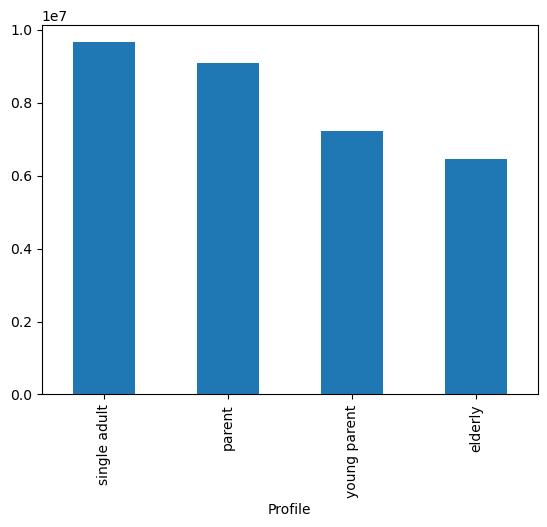

In [215]:
# Bar Chart of Profile Column

df_insta['Profile'].value_counts().plot.bar()

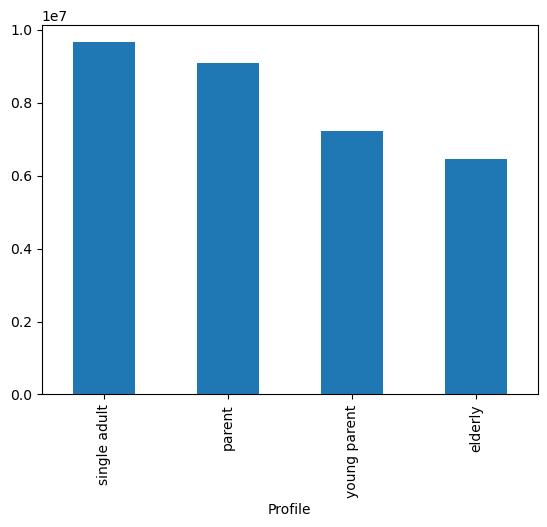

In [316]:
# Saving Bar Chart

Bar_Profile = df_insta['Profile'].value_counts().plot.bar() 

In [318]:
# Exporting Bar Chart

Bar_Profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Profile_4.10_pt1.png'))

## Aggregate variables for level of usage and expenditure

In [224]:
# Explore Data for Usage and Expenditure

use_expend = df_insta[['user_id', 'max_order', 'loyalty_flag', 'spender_type']]

In [226]:
use_expend.head(30)

,user_id,max_order,loyalty_flag,spender_type
0,138,32,Regular customer,Low spender
1,138,32,Regular customer,Low spender
2,709,5,New customer,Low spender
3,764,3,New customer,Low spender
4,764,3,New customer,Low spender
5,777,26,Regular customer,Low spender
6,825,9,New customer,Low spender
7,910,12,Regular customer,Low spender
8,1052,20,Regular customer,Low spender
9,1052,20,Regular customer,Low spender


In [238]:
# Aggregating data

df_insta.groupby(['loyalty_flag', 'spender_type']).agg({'max_order':['max', 'mean', 'min']})

max_order               
                                    max       mean min
loyalty_flag     spender_type                         
Loyal customer   High spender        99  63.953996  41
                 Low spender         99  63.994997  41
New customer     High spender        10   6.572704   1
                 Low spender         10   6.576135   1
Regular customer High spender        40  23.414648  11
                 Low spender         40  23.438541  11

## Compare customer profiles, regions and departments

In [246]:
# Exploring profile, region and deparment

compare_insta = df_insta[['department_id','product_name', 'Region', 'Profile']]

In [258]:
compare_insta.head()

,department_id,product_name,Region,Profile
0,19,Chocolate Sandwich Cookies,Region 2,elderly
1,19,Chocolate Sandwich Cookies,Region 2,elderly
2,19,Chocolate Sandwich Cookies,Region 1,elderly
3,19,Chocolate Sandwich Cookies,Region 2,young parent
4,19,Chocolate Sandwich Cookies,Region 2,young parent


In [278]:
# Group by Region, Profile, Department

df_insta.groupby(['Region', 'Profile']).agg({'department_id':['count','min', 'mean', 'max']})

department_id                  
                              count min      mean max
Region   Profile                                     
Region 1 elderly            1158056   1  9.957924  21
         parent             1613463   1  9.936104  21
         single adult       1686415   1  9.924245  21
         young parent       1264802   1  9.937020  21
Region 2 elderly            1498082   1  9.873427  21
         parent             2154690   1  9.923763  21
         single adult       2271717   1  9.915844  21
         young parent       1672836   1  9.938519  21
Region 3 elderly            2145202   1  9.914084  21
         parent             2985723   1  9.887112  21
         single adult       3231243   1  9.924107  21
         young parent       2429717   1  9.915832  21
Region 4 elderly            1653660   1  9.909604  21
         parent             2335041   1  9.960422  21
         single adult       2458731   1  9.890423  21
         young parent       1845481   1  9.940627  21

#### Looking through this data there are some instances where a particullar profile spends more (when looking at count) compared to another. There are different fluctuations and there's no indication that a single adult spends more or less than a young parent or a parent in general. Elderly also don't have a limit in the speading (looking at count) per region either.

In [307]:
# Compare Bar Chart step 1

comp_bar = df_insta.groupby(['Region', 'Profile']).size()

In [309]:
# Compare Bar Chart step 2

comp_bar = counts.unstack()

<Axes: xlabel='Region,Profile'>

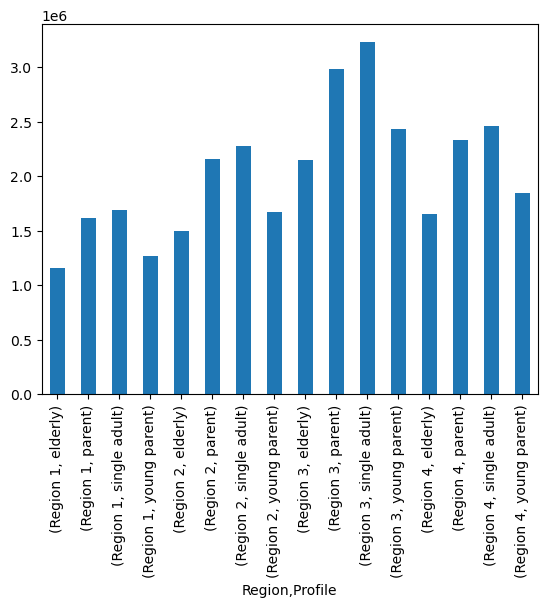

In [311]:
# Compare Bar Chart step 3

counts.plot.bar()

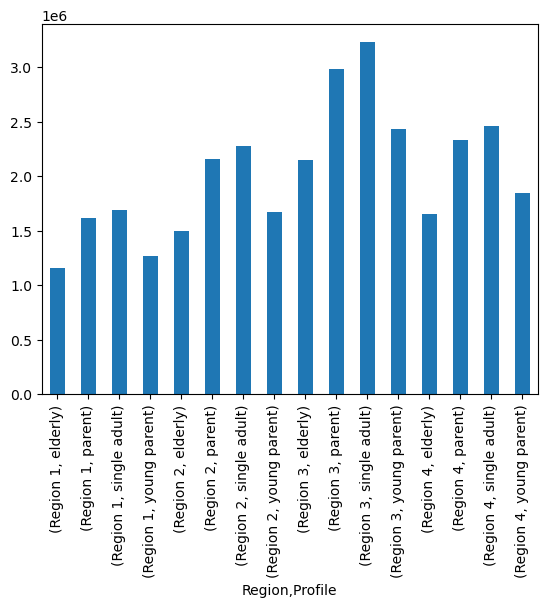

In [320]:
# Saving Bar Chart

Bar_Compare = counts.plot.bar()

In [322]:
# Export Bar Chart

Bar_Compare.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Compare_4.10_pt1.png'))

## Exporting Data Frame

In [325]:
df_insta.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_insta_4.10._pt1pkl'))